# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

### Import Libraries and Read Data

Imports several libraries commonly used for data analysis, visualization, and reads two CSV files called `df` and `df_content`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()


,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


In [3]:
print(df.columns)
print(df_content.columns)

Index(['article_id', 'title', 'email'], dtype='object')
Index(['doc_body', 'doc_description', 'doc_full_name', 'doc_status',
       'article_id'],
      dtype='object')


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

Count the number of interactions per user

In [4]:
# Count the number of interactions per user
user_interaction_counts = df.groupby('email')['article_id'].count()
print(user_interaction_counts)

email
0000b6387a0366322d7fbfc6434af145adf7fed1    13
001055fc0bb67f71e8fa17002342b256a30254cd     4
00148e4911c7e04eeff8def7bbbdaf1c59c2c621     3
001a852ecbd6cc12ab77a785efa137b2646505fe     6
001fc95b90da5c3cb12c501d201a915e4f093290     2
0042719415c4fca7d30bd2d4e9d17c5fc570de13     2
00772abe2d0b269b2336fc27f0f4d7cb1d2b65d7     3
008ba1d5b4ebf54babf516a2d5aa43e184865da5    10
008ca24b82c41d513b3799d09ae276d37f92ce72     1
008dfc7a327b5186244caec48e0ab61610a0c660    13
009af4e0537378bf8e8caf0ad0e2994f954d822e     1
00bda305223d05f6df5d77de41abd2a0c7d895fe     4
00c2d5190e8c6b821b0e3848bf56f6e47e428994     3
00ced21f957bbcee5edf7b107b2bd05628b04774     4
00d9337ecd5f70fba1c4c7a78e21b3532e0112c4     3
00e524e4f13137a6fac54f9c71d7769c6507ecde    11
00f8341cbecd6af00ba8c78b3bb6ec49adf83248     3
00f946b14100f0605fa25089437ee9486378872c     1
01041260c97ab9221d923b0a2c525437f148d589     2
0108ce3220657a9a89a85bdec959b0f2976dd51c     4
011455e91a24c1fb815a4deac6b6eaf5ad16819e     9
01198c5

Visualize the distribution with a histogram

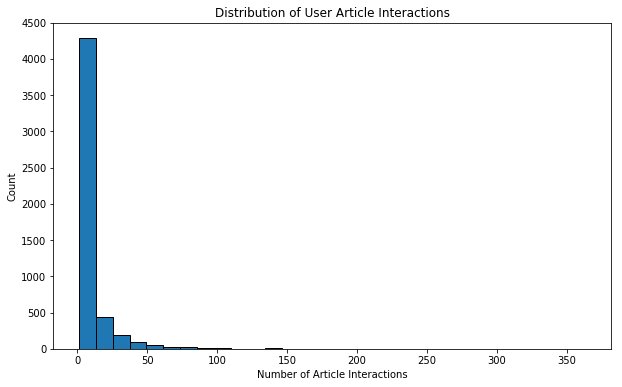

In [5]:
# Visualize the distribution with a histogram
plt.figure(figsize=(10, 6))
plt.hist(user_interaction_counts, bins=30, edgecolor='k')
plt.xlabel('Number of Article Interactions')
plt.ylabel('Count')
plt.title('Distribution of User Article Interactions')
plt.show()

Calculate median number of articles interacted by users, also maximum number of user-article interactions.

In [6]:
# Calculate median number of articles interacted by users
median_val = user_interaction_counts.median()
print(f"50% of individuals interact with {median_val} number of articles or fewer.")

# Calculate maximum number of user-article interactions
max_views_by_user = user_interaction_counts.max()
print(f"The maximum number of user-article interactions by any 1 user is {max_views_by_user}.")

50% of individuals interact with 3.0 number of articles or fewer.
The maximum number of user-article interactions by any 1 user is 364.


`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

Find duplicate articles based on article ID and explore it.

In [7]:
# Find duplicate articles based on article ID and explore it
duplicate_articles = df_content[df_content.duplicated(subset='article_id', keep=False)]

print("Duplicate Articles:")
print(duplicate_articles)

Duplicate Articles:
                                              doc_body  \
50   Follow Sign in / Sign up Home About Insight Da...   
221  * United States\r\n\r\nIBM® * Site map\r\n\r\n...   
232  Homepage Follow Sign in Get started Homepage *...   
365  Follow Sign in / Sign up Home About Insight Da...   
399  Homepage Follow Sign in Get started * Home\r\n...   
578  This video shows you how to construct queries ...   
692  Homepage Follow Sign in / Sign up Homepage * H...   
761  Homepage Follow Sign in Get started Homepage *...   
970  This video shows you how to construct queries ...   
971  Homepage Follow Sign in Get started * Home\r\n...   

                                       doc_description  \
50                        Community Detection at Scale   
221  When used to make sense of huge amounts of con...   
232  If you are like most data scientists, you are ...   
365  During the seven-week Insight Data Engineering...   
399  Today’s world of data science leverages data f

Check the number of occurrences for each duplicate article.

In [8]:
# Check the number of occurrences for each duplicate article
duplicate_counts = duplicate_articles['article_id'].value_counts()
print("\nNumber of Occurrences for Each Duplicate Article:")
print(duplicate_counts)


Number of Occurrences for Each Duplicate Article:
398    2
221    2
232    2
50     2
577    2
Name: article_id, dtype: int64


Remove any rows that have the same article_id - only keep the first.

In [9]:
# Remove duplicate rows based on article_id, keeping only the first occurrence
df_content_unique = df_content.drop_duplicates(subset='article_id', keep='first')

# Verify the result by checking the number of rows
print("Number of rows after removing duplicates:", len(df_content_unique))

Number of rows after removing duplicates: 1051


`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

To calculate the number of unique articles that have at least one interaction, the number of unique articles on the IBM platform, the number of unique users, and the total number of user-article interactions, we can use the following code:

In [10]:
# The number of unique articles that have at least one interaction
unique_articles = len(df['article_id'].unique())

# The number of unique articles on the IBM platform
total_articles = len(df_content['article_id'].unique())

# The number of unique users
unique_users = len(df['email'].unique())

# The number of user-article interactions
user_article_interactions = len(df)

# Print the results
print("Number of unique articles with at least one interaction:", unique_articles)
print("Number of unique articles on the IBM platform:", total_articles)
print("Number of unique users:", unique_users)
print("Number of user-article interactions:", user_article_interactions)

Number of unique articles with at least one interaction: 714
Number of unique articles on the IBM platform: 1051
Number of unique users: 5149
Number of user-article interactions: 45993


`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

Find the most viewed article in the dataset and the number of times it was viewed

In [11]:
# The most viewed article in the dataset
most_viewed_article_id = str(df['article_id'].value_counts().idxmax())

# The number of times the most viewed article was viewed
max_views = df['article_id'].value_counts().max()

# Print the results
print("Most viewed article ID:", most_viewed_article_id)
print("Number of views for the most viewed article:", max_views)

Most viewed article ID: 1429.0
Number of views for the most viewed article: 937


In [12]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column
def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# Show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [13]:
## If you stored all your results in the variable names above, 
## You shouldn't need to change anything in this cell
sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In the code below, `get_top_articles()` uses the `value_counts()` function on the `'title'` column of the DataFrame `df` to count the interactions for each article title. It then selects the top `'n'` articles based on the highest interaction counts and returns a list of the article titles.

Similarly, `get_top_article_ids()` uses the `value_counts()` function on the `'article_id'` column of df to count the interactions for each article ID. It selects the top `'n'` articles based on the highest interaction counts and returns a list of the article IDs.

In [14]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    '''
    
    top_articles = df['title'].value_counts().head(n).index.tolist()
    
    # Return the top article titles from df (not df_content)
    return top_articles 

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article ids
    '''
    
    top_articles = df['article_id'].value_counts().head(n).index.tolist()
    
    # Return the top article ids
    return top_articles 


Print the top 10 articles by number of interactions and their corresponding article IDs

In [15]:
# Print the top 10 articles by number of interactions and their corresponding article IDs
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [16]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [17]:
# Create the user-article matrix with 1's and 0's
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    user_item = df.groupby(['user_id', 'article_id'])['title'].count().unstack()
    user_item = user_item.notnull().astype(int)
    
    return user_item

user_item = create_user_item_matrix(df)

In [18]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [19]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered list of the most similar users to the provided user_id
    '''
    # Compute similarity of each user to the provided user
    similarity = user_item.dot(user_item.loc[user_id])

    # Sort by similarity in descending order
    similarity = similarity.sort_values(ascending=False)

    # Create a list of user_ids excluding the provided user_id
    most_similar_users = similarity.index.tolist()
    
    # Remove the own user's id
    most_similar_users.remove(user_id)

    # Return a list of the users in order from most to least similar
    return most_similar_users 

In [20]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 4459, 203]
The 3 most similar users to user 46 are: [4201, 23, 3782]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [21]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    article_names = df[df['article_id'].isin(article_ids)]['title'].drop_duplicates().values.tolist()
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Retrieving article ids
    article_ids = user_item.loc[user_id][user_item.loc[user_id] == 1].index.astype(str).tolist()
    
    # Retrieving article name
    article_names = get_article_names(article_ids)
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Creating a empty list
    recs = []
    
    # List of the similar users
    similar_users = find_similar_users(user_id)
    
    # Articles seen by the similar users
    for user in similar_users:
        article_ids, _ = get_user_articles(user)
        
        # Total recommendation
        recs.extend(article_ids)
        if len(recs) > (m - 1):
            break
            
    # Only top m recommendations
    recs = recs[:m]
    
    # Return your recommendations for this user_id
    return recs 


In [22]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1


['time series prediction using recurrent neural networks (lstms)',
 'deep learning with tensorflow course by big data university',
 'tensorflow quick tips',
 'sector correlations shiny app',
 'new shiny cheat sheet and video tutorial',
 'introduction to market basket analysis in\xa0python',
 'tidyverse practice: mapping large european cities',
 'fighting gerrymandering: using data science to draw fairer congressional districts',
 'python for loops explained (python for data science basics #5)',
 'introducing ibm watson studio ']

In [23]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [24]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Creating a dataframe
    neighbors_df  = pd.DataFrame(columns= ['neighbor_id', 'similarity', 'num_interactions'])
    
    # Article count
    article_count = df.groupby('user_id').count()
    
    for item in user_item.index.values:
        if item != user_id:
            neighbor_id = item
            
            # Similarity value
            similarity = user_item[user_item.index == user_id].dot(user_item.loc[item].T).values[0]
            
            # Number of interactions
            num_interactions = user_item.loc[item].values.sum()
            
            # Storing value
            neighbors_df.loc[neighbor_id] = [neighbor_id, similarity, num_interactions]
    
    neighbors_df['similarity'] = neighbors_df['similarity'].astype('int')
    neighbors_df['neighbor_id'] = neighbors_df['neighbor_id'].astype('int')
    neighbors_df = neighbors_df.sort_values(by = ['similarity', 'neighbor_id'], ascending = [False, True])

    # Return the dataframe specified in the doc_string
    return neighbors_df 


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    neighbors_df = get_top_sorted_users(user_id)
    similar_users = neighbors_df['neighbor_id'].values.tolist()
    recs = []

    # Given user's article ids which user read
    user_article_ids = list(set(get_user_articles(user_id)[0]))
    
    for neighbor_id in similar_users:
        recs.extend(df[df['user_id'] == neighbor_id]['article_id'].values.tolist())
    recs = list(set(recs))
    
    # Selecting articles not seen by user_id
    recs = [ x for x in recs if x not in user_article_ids]
    
    recs_df = df[df.article_id.isin(recs)][['article_id', 'title']].drop_duplicates().head(m)
    recs = recs_df['article_id'].values.tolist()
    rec_names = recs_df['title'].values.tolist()
    
    return recs, rec_names

In [25]:
print("The article names for user 1 are: {}".format(get_user_articles(1)[1]))
print("The article names for user 3 are: {}".format(get_user_articles(3)[1]))

print("Recommendations for user 1: {}".format(user_user_recs(1)))
print("Recommendations for user 3: {}".format(user_user_recs(3)))

The article names for user 1 are: ['using pixiedust for fast, flexible, and easier data analysis and experimentation', 'use deep learning for image classification', 'classify tumors with machine learning', 'apache spark lab, part 1: basic concepts', 'access db2 warehouse on cloud and db2 with python', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'putting a human face on machine learning', 'gosales transactions for naive bayes model', 'welcome to pixiedust', 'uci ml repository: chronic kidney disease data set', 'time series prediction using recurrent neural networks (lstms)', 'finding optimal locations of new store using decision optimization', 'jupyter notebook tutorial', 'deep learning with tensorflow course by big data university', 'rapidly build machine learning flows with dsx', 'tensorflow quick tips', 'analyze db2 warehouse on cloud data in rstudio in dsx', 'uci: iris', 'sudoku', 'super fast string matching in python', 'sector c

In [26]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
[1430.0, 1314.0, 1429.0, 1338.0, 1276.0, 1432.0, 593.0, 1185.0, 993.0, 14.0]

The top 10 recommendations for user 20 are the following article names:
['using pixiedust for fast, flexible, and easier data analysis and experimentation', 'healthcare python streaming application demo', 'use deep learning for image classification', 'ml optimization using cognitive assistant', 'deploy your python model as a restful api', 'visualize data with the matplotlib library', 'upload files to ibm data science experience using the command line', 'classify tumors with machine learning', 'configuring the apache spark sql context', 'got zip code data? prep it for analytics. – ibm watson data lab – medium']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [27]:
### Tests with a dictionary of results

# Find the user that is most similar to user 1
user1_most_sim = get_top_sorted_users(1).iloc[0].neighbor_id

# Find the 10th most similar user to user 131
user131_10th_sim = get_top_sorted_users(131).iloc[9].neighbor_id

user1_most_sim, user131_10th_sim

(3933, 242)

In [28]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**Provide your response here.**

The `get_top_sorted_users` function helps us find users who are similar to a new user based on their interactions with articles. It takes into account the number of article interactions each user has. By using this function, we can identify users who have similar interests or preferences as the new user. This information can be valuable for making recommendations to the new user.

Then `user_user_recs_part2` function relies on the user-item interactions to make recommendations. However, since the new user doesn't have any interaction history, this function wouldn't be useful for providing recommendations to them.

In summary, if we want to provide recommendations to a new user, `get_top_sorted_users` function is more suitable because it helps us find similar users based on their article interactions, allowing us to make recommendations based on the behavior of those similar users.

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [29]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10)
new_user_recs


[1429.0,
 1330.0,
 1431.0,
 1427.0,
 1364.0,
 1314.0,
 1293.0,
 1170.0,
 1162.0,
 1304.0]

In [30]:
assert set(str(x) for x in new_user_recs) == set(['1314.0', '1429.0', '1293.0', '1427.0', '1162.0', '1364.0', '1304.0', '1170.0', '1431.0', '1330.0']), "Oops! It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right! Nice job!")

That's right! Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [31]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [32]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [33]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [34]:
# Quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [35]:
# Perform SVD on the User-Item Matrix Here
# Use the built in to get the three matrices
u, s, vt = np.linalg.svd(user_item_matrix)


In [36]:
# Preview the matrix U
print("Matrix U:")
print(u)

# Preview the diagonal matrix Σ
print("Diagonal Matrix Σ:")
print(s)

# Preview the matrix V^T
print("Matrix V^T:")
print(vt)

Matrix U:
[[ -4.30899801e-02   8.30671762e-03   2.75704572e-02 ...,  -3.26167651e-04
    2.11074146e-05  -5.48710343e-03]
 [ -1.03765691e-02   1.64771768e-02   6.04781444e-03 ...,   1.74265092e-03
    1.50580351e-03  -1.00671019e-03]
 [ -4.98474594e-02   1.44789670e-03  -1.64960631e-02 ...,   2.91349069e-03
    7.04029482e-04   2.10437236e-03]
 ..., 
 [ -3.22580101e-05  -7.76317124e-05   5.55685276e-05 ...,   9.30981717e-01
   -1.39101319e-04  -6.47656557e-04]
 [ -2.46741942e-03   3.80247363e-03  -4.46702539e-03 ...,  -1.07663799e-04
    9.93286310e-01  -4.54103224e-04]
 [ -4.91946427e-04  -1.00943223e-03   4.99509739e-04 ...,  -3.42372822e-04
   -7.29050159e-05   9.68284979e-01]]
Diagonal Matrix Σ:
[  5.53457037e+01   2.32486418e+01   2.17600228e+01   2.06583341e+01
   1.99708867e+01   1.95569462e+01   1.91632342e+01   1.87197508e+01
   1.83438615e+01   1.80639261e+01   1.76377686e+01   1.74335474e+01
   1.74301733e+01   1.70930876e+01   1.67638529e+01   1.64669871e+01
   1.64559512e+

**Provide your response here.**

In this case the user-item matrix is a binary matrix, where the entries represent whether a user has interacted with an article or not (1 or 0).

Since the user-item matrix in this case is binary and does not contain explicit ratings, SVD cannot directly provide meaningful latent factors based on ratings. However, SVD can still help us identify hidden factors that describe user preferences and article characteristics.

By using SVD, we can reduce the complexity of the matrix and find these hidden factors. These factors can then be used to make recommendations by finding users or articles that have similar factor values. This allows us to suggest articles to users based on their preferences and similarities to other users.


`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

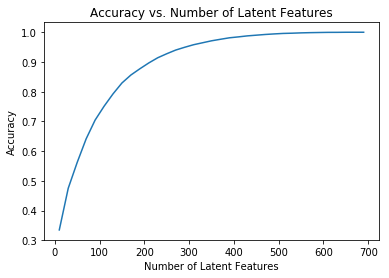

In [37]:
num_latent_feats = np.arange(10,700+10,20)
sum_error = []

for k in num_latent_feats:
    # Restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # Take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # Compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # Total errors and keep track of them
    error = np.sum(np.sum(np.abs(diffs)))
    sum_error.append(error)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_error)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [38]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # user_item_matrix for training data
    user_item_train = create_user_item_matrix(df_train)
    # user_item_matrix for testing data
    user_item_test = create_user_item_matrix(df_test)
    
    # user_ids
    train_idx = set(user_item_train.index)
    test_idx = set(user_item_test.index)
    match_idx = list(train_idx.intersection(test_idx))
    
    # article_ids
    train_arts = set(user_item_train.columns)
    test_arts =  set(user_item_test.columns)
    match_cols = list(train_arts.intersection(test_arts))

     
    user_item_test = user_item_test.loc[match_idx, match_cols]
    
    return user_item_train, user_item_test, test_idx, test_arts


user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)


In [39]:
# Number of users we can make predictions for in the test set
num_users_test = len(np.intersect1d(df_train['user_id'].unique(), df_test['user_id'].unique()))

# Number of users we are not able to make predictions for because of the cold start problem
num_users_cold_start = len(df_test['user_id'].unique()) - num_users_test

# Number of articles we can make predictions for in the test set
num_articles_test = len(np.intersect1d(df_train['article_id'].unique(), df_test['article_id'].unique()))

# Number of articles we are not able to make predictions for because of the cold start problem
num_articles_cold_start = len(df_test['article_id'].unique()) - num_articles_test

num_users_test, num_users_cold_start, num_articles_test, num_articles_cold_start


(20, 662, 574, 0)

In [40]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, 
    'How many articles can we make predictions for in the test set?': b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test articles are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [41]:
# Fit SVD on the user_item_train matrix
# Fit svd similar to above then use the cells below
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

In [42]:
# Use these cells to see how well you can use the training 
# Decomposition to predict on test data
# Select the subset of rows and columns for the test set
row_idx = user_item_train.index.isin(test_idx)
col_idx = user_item_train.columns.isin(test_arts)
u_test = u_train[row_idx, :]
vt_test = vt_train[:, col_idx]

In [43]:
num_latent_feats = np.arange(10,700+10,20)
train_error_sum = []
test_error_sum = []
total_error = []

for k in num_latent_feats:
    # Restructure with k latent features
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    # Take dot product
    user_item_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
    user_item_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    total_error.append(1 - ((np.sum(user_item_test_preds)+np.sum(np.sum(user_item_test)))/(user_item_test.shape[0]*user_item_test.shape[1])))
    
    
    # Computing difference in prediction value
    train_dif = np.subtract(user_item_train, user_item_train_preds)
    test_dif = np.subtract(user_item_test, user_item_test_preds)
    
    # Training and testing error
    train_error = np.sum(np.sum(np.abs(train_dif)))
    test_error = np.sum(np.sum(np.abs(test_dif)))
    
    train_error_sum.append(train_error)
    test_error_sum.append(test_error)

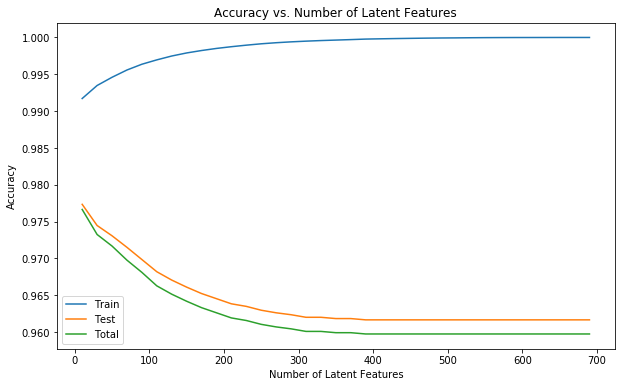

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(num_latent_feats, 1 - np.array(train_error_sum) / (user_item_train.shape[0] * user_item_train.shape[1]), label='Train')
plt.plot(num_latent_feats, 1 - np.array(test_error_sum) / (user_item_test.shape[0] * user_item_test.shape[1]), label='Test')
plt.plot(num_latent_feats, total_error, label='Total')
plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Latent Features')
plt.legend()
plt.show()

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**Your response here.**

The trend indicates overfitting since more latent features in the model increase accuracy in the training data, but decrease in the test data.

Maybe the reason for this beacuse few interactions between users and articles in the dataset, making it difficult for the model to find meaningful patterns. As a result, when we use more latent features, the model more focused on the specific interactions in the training data and fails to generalize to new interactions.

To determine if the recommendations above are an improvement over how users currently find articles, we can perform an A/B test with the steps below:

1. Randomly select a group of users to participate in the test. This group will use the new recommendation system to find articles.
2. Keep another random group of users as a comparison. They will continue using the current method of finding articles.
3. Measure and compare how well the two groups perform. We look at things like how often they click on recommended articles, how much time they spend reading those articles, or any other relevant measures of user engagement. 

By comparing the results, we can determine if the new recommendation system is significantly better than the current method. If the new system performs significantly better, we can conclude that it is an improvement and consider implementing it for all users.

It's important to make sure the test is fair and random, collect enough data, and consider any factors that could affect the results. Eventually, the goal is to see if the new recommendations lead to a better user experience and engagement with articles.

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! 

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])

0